### TITANIC PROJECT 

This is the Titanic: 



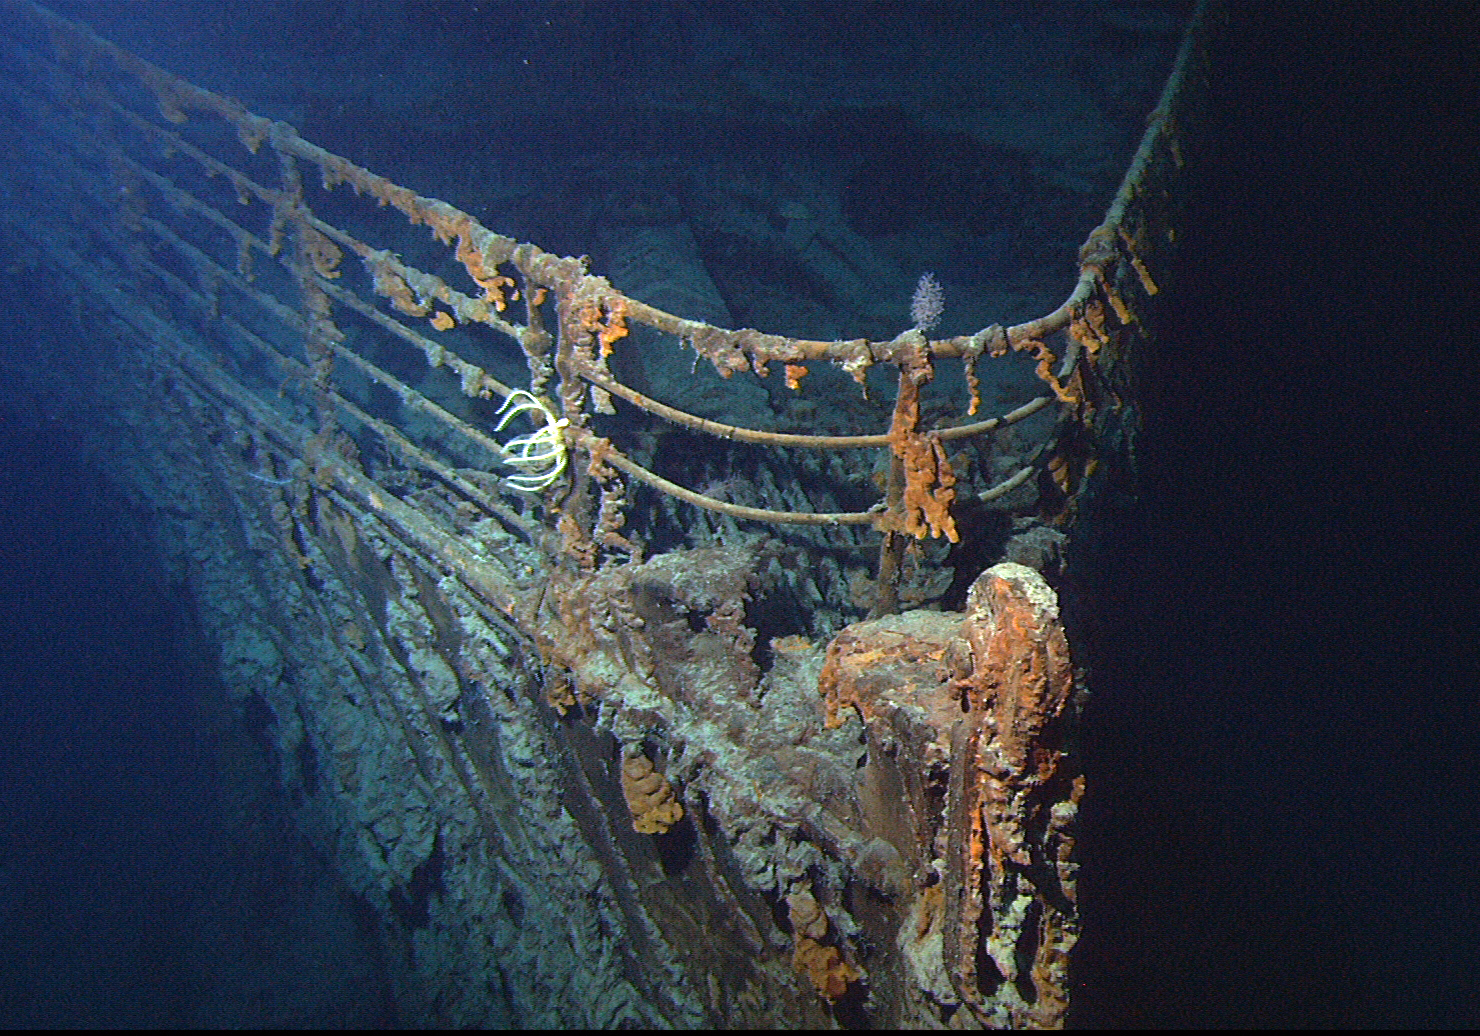

In [1]:
from IPython.display import Image
url = 'https://upload.wikimedia.org/wikipedia/commons/9/9c/Titanic_wreck_bow.jpg' 
print('This is the Titanic:','\n')
Image(url,width=1000, height=1000)

##### 1.0 IMPORT ALL THE NECESSARY LIBRARIES FOR OUR PROJECT:

In [2]:
# Data Manipulation
import pandas as pd
import numpy as np
import random as rnd

# Data Visualization 
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### DEFINITIONS AND QUICK THOUGHTS:

In [3]:
# PassengerId = Unique identification of the passenger. It shouldn't be necessary for the machine learning model
# Survived= Survival (0 = No, 1 = Yes). Binary variable that will be our target variable
# Pclass= Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
# Name= Name of the passenger. We need to parse before using it
# Sex= Sex. Categorical variable that should be encoded
# Age= Age in years
# SibSp = of siblings / spouses aboard the Titanic
# Parch = of parents / children aboard the Titanic
# Ticket= Ticket number. Big mess. We need to understand its structure first
# Fare= Passenger fare
# Cabin= Cabin number. It needs to be parsed
# Embarked= Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton). Categorical feature that should be encoded

##### 2.0 GET TO KNOW WITH THE DATASET

##### 2.1 GET THE DATA

In [4]:
# After we download both of the datasets, we have to load them in Jupyter in order to star the analysis
# First, we load and read the 'train.csv' and after that we load and read the 'test.csv'
# However we will use only the fist dataset for the analysis and the second in order to test our algorithms and predict who survived on not  

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Here we combine both datasets into one, for a better view of the data
combine = [train_df, test_df]

In [5]:
# The name of it's column 

print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [6]:
# Preview the first five lines of train dataset 

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Preview the first five lines of test dataset 

test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
# Checking for null value counts in each column of our dataset. As we already have said above we only use the train dataset
# Only in columns 'Age' and 'Cabin' and 'Embarked' we miss data as we can see below
# The missing data is very ctitical and we are going to deal with them in the nexts lines of code
# Below the project we will see and another way for checking for empty values 

print('Train columns with null values are: \n') 
train_df.isnull().sum()

Train columns with null values are: 



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Only in columns 'Age' , 'Fare' and 'Cabin' we miss data as we can see below

print('Test columns with null values are: \n') 
test_df.isnull().sum()

Test columns with null values are: 



PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
# More information about our datasets
# If you look more carefully in the first dataset you will notice that in the columns 'Age', 'Cabin' and 'Emabrked' 
# we have 714, 204 and 889 data instead of 819 as the others columns 
# This is expected because we already know that we are missing 86, 327 and 2 data 
# If you don't get it just do the maths and everything will make sense then 
# In addition be careful with the type of each column. Here we have int64,object and float64
# We have to convert them in numbers so the machine can access them 
# We work in the same way in the other dataset

train_df.info() 
print('\n','*'*40,'\n') 
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

 **************************************** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passe

In [11]:
# Descriptive statistics about train_df dataset 

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Kvillner, Mr. Johan Henrik Johannesson",male,1601,G6,S
freq,1,577,7,4,644


##### 3.0 DATA CLEANING:

In [13]:
# Before we start cleaning the data we must keep in minds that we have missing data in the columns 'Age' and 'Cabin' in both datasets
# However i am going to drop the column 'Cabin' because there are too many missing values, so i will not make any changes in this column
# The column 'Embarked' is in the train dataset and the column 'Fare' is in the test dataset
# This is the reason why sometimes i work with the combine dataset and sometimes only one of them
# Before we move on we must deal with the missings data
# There are two options when we want to deal with missing data
# The first way is to replace the missing data of a column with the median or you can delete once for all the missing values
# In my opinion, the first option is the best and this is what i am using always
# In order to make the replacements faster and in fewer lines of code, i will make the changes in my combine dataset 

##### 3.1 Feature Age:

In [14]:
# Preprocessing for the column 'Age'

for data in combine:
    
    mean_age = train_df['Age'].mean()
    std_age  = test_df['Age'].std()
    null_age = data['Age'].isnull().sum()
    
    # We compute random integer numbers between the mean_age, std_age and the null_age
    random_age = np.random.randint(mean_age-std_age, mean_age+std_age, size = null_age)
    
    # Now we fill the empty values with the results above 
    copy1 = data['Age'].copy()
    copy1[np.isnan(copy1)] = random_age
    data['Age'] = copy1
    data['Age'] = train_df['Age'].astype(int)

    
print('How many NaN values do we have in the column Age after the preprocessing?')
train_df['Age'].isnull().sum()

How many NaN values do we have in the column Age after the preprocessing?


0

In [15]:
# Click the link if you want to read about pd.qcut       https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html
# We use pandas in order to cut the 'Age' in 6 quarters 

for data in combine:
    data['Age_Range'] = pd.qcut(data['Age'],6)

In [16]:
# Here we see the edges of its scope of the 'Age' column   
train_df[['Age_Range','Survived']].groupby(['Age_Range'], as_index=False).mean().sort_values(by='Age_Range', ascending=True)

,Age_Range,Survived
0,"(-0.001, 18.0]",0.434524
1,"(18.0, 23.0]",0.318841
2,"(23.0, 28.0]",0.369128
3,"(28.0, 34.0]",0.377483
4,"(34.0, 41.0]",0.423358
5,"(41.0, 80.0]",0.371622


In [17]:
for data in combine:
    
    data['Age_new']=0
    
    data.loc[ data['Age'] <=  18, 'Age_new'] = 0
    
    data.loc[ (data['Age'] >  18) &  (data['Age'] <= 23) , 'Age_new'] = 1  
    
    data.loc[ (data['Age'] > 23) &  (data['Age'] <= 28) , 'Age_new'] = 2  
    
    data.loc[ (data['Age'] > 28) & (data['Age'] <= 34) , 'Age_new'] = 3   
    
    data.loc[ (data['Age'] > 34) &   (data['Age'] <= 41) , 'Age_new'] = 4  
    
    data.loc[ data['Age'] > 41 , 'Age_new'] = 5
    

data['Age'] = data['Age_new'].astype(int)
train_df = train_df.drop(['Age', 'Age_Range'] , axis =1) 
combine = [train_df,test_df]

In [18]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_new
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,4
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,4


##### 3.2 Feature Fare:

In [19]:
# Preprocessing for the column 'Fare'

train_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

# This is another way to check for missing data.  
# False means that there are no missing data and True means the exact opposite

print('Do we have any NaN values in the column Fare after the preprocessing?')
train_df['Fare'].isna().any().any()

Do we have any NaN values in the column Fare after the preprocessing?


False

In [20]:
# Let's go deep down in this column before we move on. 
# As we can see there are large differences in the amounts
# We have to change this so the algorithms will be more able to make better predictions 

train_df['Fare'].head(13)

0      7.2500
1     71.2833
2      7.9250
3     53.1000
4      8.0500
5      8.4583
6     51.8625
7     21.0750
8     11.1333
9     30.0708
10    16.7000
11    26.5500
12     8.0500
Name: Fare, dtype: float64

In [21]:
# Click the link if you want to read about pd.qcut       https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html
# We use pandas in order to cut the 'Fare' in 6 quarters 

for data in combine:
    data['Fare_Range'] = pd.qcut(data['Fare'],6)

In [22]:
# Here we see the edges of its scope of the 'Fare' column   
train_df[['Fare_Range','Survived']].groupby(['Fare_Range'], as_index=False).mean().sort_values(by='Fare_Range', ascending=True)

,Fare_Range,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [23]:
for data in combine:
    
    data['Fare_new']=0
    
    data.loc[ data['Fare'] <= 7.775, 'Fare_new'] = 0
    
    data.loc[ (data['Fare'] > 7.775) &  (data['Fare'] <= 8.662) , 'Fare_new'] = 1
    
    data.loc[ (data['Fare'] > 8.662) &  (data['Fare'] <= 14.454) , 'Fare_new'] = 2 
    
    data.loc[ (data['Fare'] > 14.454) & (data['Fare'] <= 26.0) , 'Fare_new'] = 3   
    
    data.loc[ (data['Fare'] > 26.0) &   (data['Fare'] <= 52.369) , 'Fare_new'] = 4   
    
    data.loc[ data['Fare'] > 52.369 , 'Fare_new'] = 5
    
data['Fare'] = data['Fare_new'].astype(int)
train_df = train_df.drop(['Fare', 'Fare_Range'] , axis =1) 
combine = [train_df,test_df]

In [24]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Age_new,Fare_new
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C85,C,4,5
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,NaN,S,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,C123,S,4,5
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,NaN,S,4,1


##### 3.3 Feature Embarked:

In [25]:
# Preprocessing for the column 'Embarked'
# We only miss 2 values so we will just replace the missing with the most common town 

freq_port = train_df.Embarked.dropna().mode()[0]
print ('The most common port was:',freq_port)

The most common port was: S


In [26]:
for data in combine:
    data['Embarked'] = data['Embarked'].fillna(freq_port)

# No missing data anymore
print('Do we have any NaN values in the column Embarked after the preprocessing?')
train_df['Embarked'].isnull().sum()

Do we have any NaN values in the column Embarked after the preprocessing?


0

In [27]:
# Lets just make sure that there are no more missing data
# Only in the columns 'Cabin' we have missing data, but we don not care because we are going to drop both columns

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Cabin          687
Embarked         0
Age_new          0
Fare_new         0
dtype: int64

In [28]:
# Lets just make sure that there are no more missing data
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Age_Range        0
Age_new          0
Fare_Range       1
Fare_new         0
dtype: int64

##### 4.0 DROP THE UNNECESSARY COLUMNS 

In [29]:
# Unfortunately the columns 'Cabin' and 'Ticket' are not really helpful for us, so we will have to drop them
# More specific we drop the first column because it has very much empty values and the second one because we have 'Pclass' instead 

columns_to_delete = ['Cabin','Ticket']

train_df = train_df.drop(columns_to_delete , axis = 1)
test_df  = test_df.drop(columns_to_delete , axis = 1)

combine_new = [train_df , test_df]

##### 5.0 CONVERT CATEGORICAL COLUMNS INTO NUMERIC:

##### 5.1 CONVERT THE COLUMN SEX 

In [30]:
# In our dataset we only have two columns with categorical feature 'Sex' and 'Embarked'
# Before we move on we must convert them into numeric
# This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal
# Now we convert the column 'Sex' 
# We do this because 'Sex' feature is very important for our analysis but computer can not handle categorical features for now
# From now on male will be represented as 0 and female as 1

genders = { "male": 0, "female": 1 }

for data in combine_new:
    data['Sex'] = data['Sex'].map(genders)

##### 5.2 CONVERT THE COLUMN EMBARKED

In [31]:
# Now we will convert the 'Embarked' column into numerical values by the same way as we did it before 

ports = {'S': 0, 'C': 1, 'Q': 2}

for data in combine_new:
    data['Embarked'] = data['Embarked'].map(ports)

##### 5.3 CONVERT THE COLUMN NAME AND THEN DROP IT

In [32]:
# We process the column 'Name' with the help of module regex
# We use the regex module to extract the title of each passengers
# Do not forget that male = 0 and female = 1 

for data in combine_new:
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [33]:
# As we said earlier we must convert as much as we can categorical future to numeric, so the computer can access them 

titles = { 'Miss': 0 , 'Mrs': 1, 'Master':2, 'Mr':3, 'Rare':4}

for data in combine_new:
    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt','Col','Don', 'Dr', 'Major',
                                                 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
   
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    
    # convert titles into numbers
    data['Title'] = data['Title'].map(titles)

# The finall results   
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,0,0.702703
1,1,0.793651
2,2,0.575000
3,3,0.156673
4,4,0.347826


In [34]:
# After we convert the column 'Name' into numeric we do not need it anymore, so we finally can drop it
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

#### FINAL DATASET

In [35]:
# This is the final dataset we are going to analyze, after all the preprocessing we did earlier
# As we can see we only have numbers instead of words

train_df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_new,Fare_new,Title
0,1,0,3,0,1,0,0,1,0,3
1,2,1,1,1,1,0,1,4,5,1
2,3,1,3,1,0,0,0,2,1,0
3,4,1,1,1,1,0,0,4,5,1
4,5,0,3,0,0,0,0,4,1,3


In [36]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
1,1,0.553571
2,2,0.389610
0,0,0.339009


In [37]:
# Survived/Died by Class

train_df[['Pclass', 'Survived']].groupby(['Pclass'] , as_index=False).mean().sort_values(by='Survived' , ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [38]:
# Survived/Died by Sex

train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
1,1,0.742038
0,0,0.188908


In [39]:
# Survived/Died by SibSp

train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [40]:
# Survived/Died by Parch

train_df[["Parch", "Survived"]].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [41]:
# Survived/Died by Embarked

train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
1,1,0.553571
2,2,0.389610
0,0,0.339009


#### DATA VISUALIZATION 

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

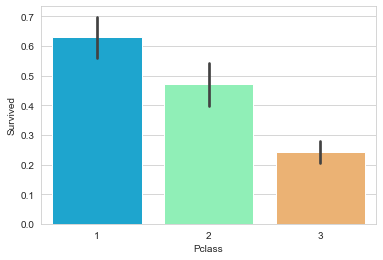

In [42]:
# As we can see below the majority of the people who survived were at the first class, 
# while the majority of deaths at the Titanic was poor people who belonged at the third class

sns.barplot(x='Pclass',y='Survived',data =train_df,palette='rainbow')

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

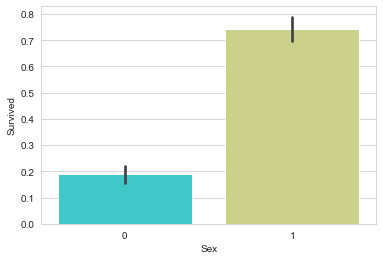

In [43]:
# Here we can observe that most of the survivors were female. Which was to be expected

sns.barplot(x='Sex',y='Survived',data =train_df,palette='rainbow') 

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

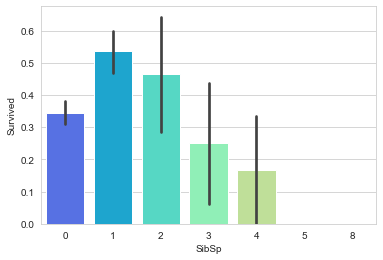

In [44]:
# In this kernel, we can observe the attachment of the people who survived and their multitude of their siblings
# Unfortunately, the more siblings someone had, the fewer chances they had of surviving
# As you see the people who had five or eight siblings, definitely died
# In contrast, however, people who had zero or one sibling had more possibilities of surviving

sns.barplot(x='SibSp',y='Survived',data =train_df,palette='rainbow') 

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

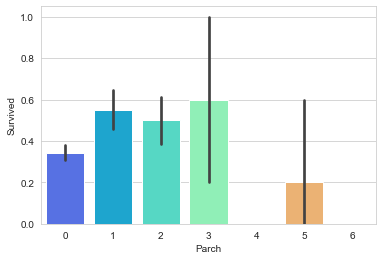

In [45]:
# Here we see that most of the passengers were families with the total number of children were three

sns.barplot(x='Parch',y='Survived',data =train_df,palette='rainbow')

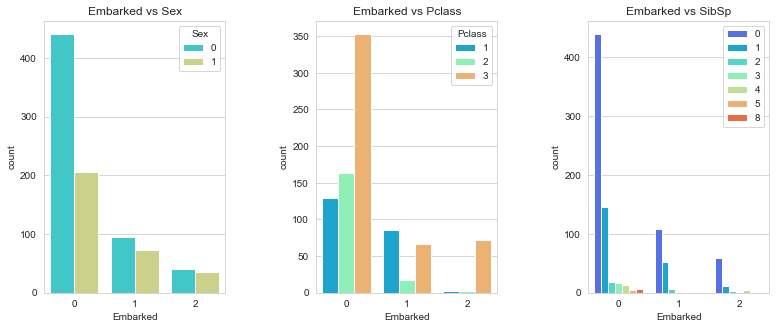

In [46]:
# Here we go deep down of the original cities of the people before they sail with the Titanic 

f,ax=plt.subplots(1,3,figsize=(13,5))

sns.countplot(x= 'Embarked',hue='Sex',data=train_df ,ax=ax[0],palette = 'rainbow')
ax[0].set_title('Embarked vs Sex')

sns.countplot(x='Embarked',hue='Pclass',data=train_df,ax=ax[1],palette = 'rainbow')
ax[1].set_title('Embarked vs Pclass')

sns.countplot(x='Embarked',hue='SibSp',data=train_df,ax=ax[2],palette = 'rainbow')
ax[2].set_title('Embarked vs SibSp')

plt.subplots_adjust(wspace=0.5,hspace=4)
plt.legend(loc='upper right')
plt.show()

##### MACHINE LEARNING MODELS 

In [47]:
X_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]
X_test = test_df.drop('PassengerId' , axis = 1)

In [48]:
print('The shape of X_train , y_train and test_df are:')
print(X_train.shape, y_train.shape ,test_df['PassengerId'].shape) 

The shape of X_train , y_train and test_df are:
(891, 9) (891,) (418,)


##### SPLIT THE DATA 

In [49]:
# We split the data in train set and test set before we apply me algorithms

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

##### LOGISTIC REGRESSION 

In [50]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train,y_train)
Y_pred = log.predict(X_test)
accuracy_log = round(log.score(X_train,y_train) * 100 , 2)
print('The accuracy of Logistic Regression is', accuracy_log)

The accuracy of Logistic Regression is 79.92


##### GAUSSIAN NAIVE BAYES

In [51]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
accuracy_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print('The accuracy of Naive Bayes is', accuracy_gaussian)

The accuracy of Naive Bayes is 79.49


##### SUPPORT VECTOR MACHINE

In [52]:
from sklearn.svm import SVC, LinearSVC

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
accuracy_svc = round(svc.score(X_train, y_train) * 100, 2)
print('The accuracy of Support Vector Machine is', accuracy_svc)

The accuracy of Support Vector Machine is 62.36


#### K NEIAREST NEIGHBOR

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
accuracy_knn = round(knn.score(X_train, y_train) * 100, 2)
print('The accuracy of K Nearest Neighbor is', accuracy_knn)

The accuracy of K Nearest Neighbor is 82.02


##### PERCEPTRON

In [54]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
accuracy_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
print('The accuracy of K Nearest Neighbor is', accuracy_perceptron)

The accuracy of K Nearest Neighbor is 62.78


##### LINEAR SCV

In [55]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
accuracy_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
print('The accuracy of K Nearest Neighbor is', accuracy_linear_svc)

The accuracy of K Nearest Neighbor is 80.2


#### DECISION TREE

In [56]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
accuracy_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print('The accuracy of K Nearest Neighbor is', accuracy_decision_tree)

The accuracy of K Nearest Neighbor is 100.0


##### RANDOM FOREST

In [57]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
accuracy_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print('The accuracy of K Nearest Neighbor is', accuracy_random_forest)

The accuracy of K Nearest Neighbor is 100.0


In [58]:
models = pd.DataFrame({'Model': ['Support Vector Machines SVC', 'KNN', 'Logistic Regression', 
                                'Random Forest','Linear SVC', 'Naive Bayes','Decision Tree'],
                       
                           'Score': [accuracy_svc, accuracy_knn, accuracy_log, 
                                     accuracy_random_forest, accuracy_linear_svc, accuracy_gaussian,accuracy_decision_tree]})
     

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
6,Decision Tree,100.00
1,KNN,82.02
4,Linear SVC,80.20
2,Logistic Regression,79.92
5,Naive Bayes,79.49
0,Support Vector Machines SVC,62.36


##### CROSS VALIDATION 

In [59]:
from sklearn.model_selection import cross_val_score

log = LogisticRegression()
scores = cross_val_score(log, X_train, y_train, cv=13, scoring = 'accuracy')

print("Scores:", scores,'\n')
print("Mean:", scores.mean(),'\n')
print("Standard Deviation:", scores.std(),'\n')

Scores: [0.81818182 0.85454545 0.69090909 0.74545455 0.94545455 0.83636364
 0.78181818 0.78181818 0.72727273 0.78181818 0.72222222 0.81481481
 0.90740741] 

Mean: 0.8006216006216006 

Standard Deviation: 0.0705703894894648 

